## 데이터 모델링
- 시현님이 전처리한 데이터로 진행

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
df_n = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/BDA 5기/2023 BDA 공모전/data/cj_empN2.csv')
df_y = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/BDA 5기/2023 BDA 공모전/data/cj_empY2.csv')

In [5]:
# 비임직원 데이터
df_n

,scd,gender,age_grp,order_date,total_qty,total_amt,event_product,amt/qty,prime_yn,ctg_0,ctg_1,ctg_2,ctg_3
0,20230101963244,0,4,0,3,10.234373,0,3.411458,1,0,3,0,0
1,20230101963277,1,3,0,1,9.190036,0,9.190036,1,0,0,1,0
2,20230101963302,0,4,0,17,83.446280,0,7.574948,0,8,3,1,5
3,20230101963319,1,4,0,23,73.452653,0,4.093077,0,17,3,3,0
4,20230101963336,0,3,0,30,119.943496,0,6.208069,1,13,14,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5935,20230131216709,0,4,1,6,27.526347,0,7.037744,1,2,0,0,4
5936,20230131216756,0,4,1,3,18.314758,0,6.796144,0,0,3,0,0
5937,20230131216771,0,4,1,2,9.125762,0,4.562881,1,2,0,0,0
5938,20230131216842,1,3,1,1,10.176411,1,10.176411,0,0,0,1,0


In [6]:
# 임직원 데이터
df_y

,scd,gender,age_grp,order_date,total_qty,total_amt,event_product,amt/qty,prime_yn,ctg_0,ctg_1,ctg_2,ctg_3
0,20230101963226,1,3,0,6,39.433806,2,7.609629,0,2,0,4,0
1,20230101963235,0,4,0,2,19.234566,2,9.617283,1,1,1,0,0
2,20230101963247,1,3,0,6,45.516855,0,8.070212,1,2,2,0,2
3,20230101963251,0,3,0,2,10.845621,0,5.422811,1,0,0,0,2
4,20230101963253,1,2,0,6,47.014742,0,8.445540,1,1,4,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4708,20230131216567,0,5,1,6,27.652922,1,5.733350,1,6,0,0,0
4709,20230131216610,1,3,1,12,81.994470,6,8.342528,1,7,3,0,2
4710,20230131216674,1,4,1,4,37.317843,0,9.329461,0,0,4,0,0
4711,20230131216734,1,5,1,3,29.500314,3,9.833438,1,2,0,1,0


### 비임직원

In [7]:
df_n['prime_yn'].value_counts()

0    3445
1    2495
Name: prime_yn, dtype: int64

In [9]:
df_n.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5940 entries, 0 to 5939
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   scd            5940 non-null   int64  
 1   gender         5940 non-null   int64  
 2   age_grp        5940 non-null   int64  
 3   order_date     5940 non-null   int64  
 4   total_qty      5940 non-null   int64  
 5   total_amt      5940 non-null   float64
 6   event_product  5940 non-null   int64  
 7   amt/qty        5940 non-null   float64
 8   prime_yn       5940 non-null   int64  
 9   ctg_0          5940 non-null   int64  
 10  ctg_1          5940 non-null   int64  
 11  ctg_2          5940 non-null   int64  
 12  ctg_3          5940 non-null   int64  
dtypes: float64(2), int64(11)
memory usage: 603.4 KB


array([[<Axes: title={'center': 'scd'}>,
        <Axes: title={'center': 'gender'}>,
        <Axes: title={'center': 'age_grp'}>,
        <Axes: title={'center': 'order_date'}>],
       [<Axes: title={'center': 'total_qty'}>,
        <Axes: title={'center': 'total_amt'}>,
        <Axes: title={'center': 'event_product'}>,
        <Axes: title={'center': 'amt/qty'}>],
       [<Axes: title={'center': 'prime_yn'}>,
        <Axes: title={'center': 'ctg_0'}>,
        <Axes: title={'center': 'ctg_1'}>,
        <Axes: title={'center': 'ctg_2'}>],
       [<Axes: title={'center': 'ctg_3'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

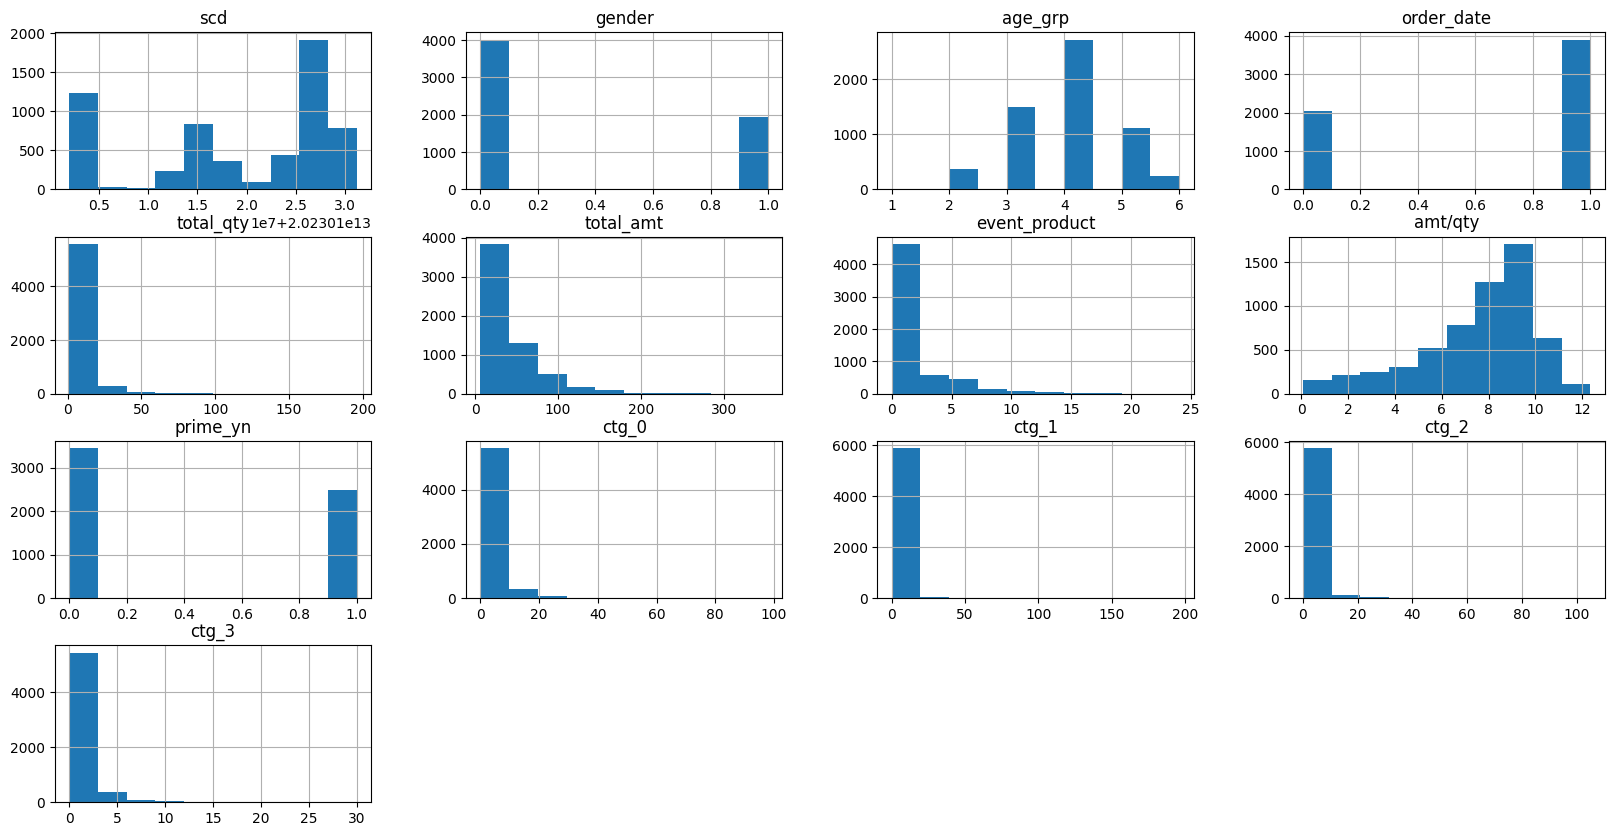

In [10]:
import matplotlib.pyplot as plt
pd.DataFrame(df_n).hist(figsize=(20,10))

- 정규화 할말?

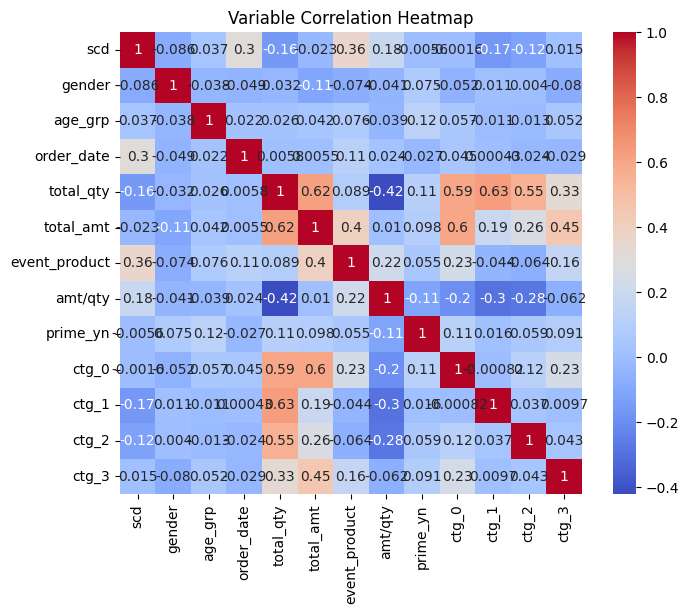

In [11]:
# 변수 간 상관관계
import seaborn as sns
import matplotlib.pyplot as plt
correlation_matrix = df_n.corr()

# 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Variable Correlation Heatmap')
plt.show()

In [17]:
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 483.6/483.6 kB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.0/150.0 kB 16.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 25.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.4/46.4 kB 5.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 66.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 5.6 MB/s eta 0:00:00


In [18]:
# automl 돌려보기
import pycaret
from pycaret import classification
classification.setup(data=df_n, target='prime_yn', remove_outliers=True)
best = classification.compare_models(n_select=5,fold=5)

,Description,Value
0,Session id,7575
1,Target,prime_yn
2,Target type,Binary
3,Original data shape,"(5940, 13)"
4,Transformed data shape,"(5732, 13)"
5,Transformed train set shape,"(3950, 13)"
6,Transformed test set shape,"(1782, 13)"
7,Numeric features,12
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.6255,0.6591,0.4799,0.5635,0.5181,0.2152,0.2172,0.4720
gbc,Gradient Boosting Classifier,0.6219,0.6555,0.3419,0.5873,0.4313,0.1767,0.1918,0.6560
ada,Ada Boost Classifier,0.6126,0.6344,0.3511,0.5637,0.4324,0.1614,0.1723,0.3840
rf,Random Forest Classifier,0.6123,0.6392,0.4359,0.5497,0.4859,0.1812,0.1846,1.0500
lightgbm,Light Gradient Boosting Machine,0.6094,0.6432,0.4410,0.5432,0.4866,0.1769,0.1795,0.4520
lda,Linear Discriminant Analysis,0.6089,0.6151,0.2921,0.5699,0.3856,0.1399,0.1575,0.0900
ridge,Ridge Classifier,0.6068,0.0000,0.2841,0.5665,0.3778,0.1338,0.1516,0.2200
et,Extra Trees Classifier,0.5895,0.6097,0.4370,0.5133,0.4720,0.1397,0.1410,1.4140
qda,Quadratic Discriminant Analysis,0.5825,0.5789,0.3351,0.5067,0.3998,0.1013,0.1075,0.0860
lr,Logistic Regression,0.5801,0.4857,0.0000,0.0000,0.0000,0.0000,0.0000,3.4060


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

In [19]:
from pycaret.classification import *
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.6316,0.6616,0.4914,0.5714,0.5280,0.2288,0.2307,0.7980
gbc,Gradient Boosting Classifier,0.6239,0.6619,0.3528,0.5921,0.4408,0.1833,0.1985,0.9560
ada,Ada Boost Classifier,0.6169,0.6421,0.3603,0.5722,0.4415,0.1718,0.1832,0.3860
rf,Random Forest Classifier,0.6142,0.6429,0.4278,0.5539,0.4822,0.1828,0.1871,1.1950
lightgbm,Light Gradient Boosting Machine,0.6135,0.6483,0.4387,0.5508,0.4882,0.1840,0.1873,0.2290
lda,Linear Discriminant Analysis,0.6041,0.6146,0.2852,0.5582,0.3767,0.1289,0.1452,0.0960
ridge,Ridge Classifier,0.6034,0.0000,0.2783,0.5575,0.3705,0.1258,0.1425,0.0720
et,Extra Trees Classifier,0.5957,0.6085,0.4358,0.5228,0.4748,0.1507,0.1526,0.8450
qda,Quadratic Discriminant Analysis,0.5914,0.5679,0.3516,0.5307,0.4018,0.1205,0.1312,0.0890
dt,Decision Tree Classifier,0.5866,0.5758,0.5086,0.5082,0.5081,0.1517,0.1518,0.1010


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [20]:
xgb = create_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6514,0.7072,0.5200,0.5987,0.5566,0.2718,0.2736
1,0.6130,0.6369,0.4457,0.5493,0.4921,0.1849,0.1876
2,0.6154,0.6544,0.4914,0.5478,0.5181,0.1996,0.2004
3,0.6154,0.6276,0.4914,0.5478,0.5181,0.1996,0.2004
4,0.6322,0.6615,0.5086,0.5705,0.5378,0.2340,0.2351
5,0.6274,0.6579,0.4743,0.5685,0.5171,0.2178,0.2202
6,0.6298,0.6623,0.4770,0.5685,0.5188,0.2217,0.2239
7,0.6418,0.6507,0.4540,0.5940,0.5147,0.2388,0.2442
8,0.6530,0.6741,0.5575,0.5915,0.5740,0.2817,0.2821


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [13]:
# X, y 나누기
X = df_n.drop('prime_yn', axis=1)
y = df_n['prime_yn']

In [14]:
X

,scd,gender,age_grp,order_date,total_qty,total_amt,event_product,amt/qty,ctg_0,ctg_1,ctg_2,ctg_3
0,20230101963244,0,4,0,3,10.234373,0,3.411458,0,3,0,0
1,20230101963277,1,3,0,1,9.190036,0,9.190036,0,0,1,0
2,20230101963302,0,4,0,17,83.446280,0,7.574948,8,3,1,5
3,20230101963319,1,4,0,23,73.452653,0,4.093077,17,3,3,0
4,20230101963336,0,3,0,30,119.943496,0,6.208069,13,14,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5935,20230131216709,0,4,1,6,27.526347,0,7.037744,2,0,0,4
5936,20230131216756,0,4,1,3,18.314758,0,6.796144,0,3,0,0
5937,20230131216771,0,4,1,2,9.125762,0,4.562881,2,0,0,0
5938,20230131216842,1,3,1,1,10.176411,1,10.176411,0,0,1,0


In [15]:
# train, valid 데이터셋 나누기
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, stratify=y, random_state=42)
print(X_train.shape, X_valid.shape, y_train.shape, y_valid.shape)

(4455, 12) (1485, 12) (4455,) (1485,)


In [34]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

# XGBoost
xgb = xgb.XGBClassifier()
xgb.fit(X_train, y_train)

# 테스트 데이터로 예측 수행
pred = xgb.predict(X_valid)

# 정확도 평가
accuracy = accuracy_score(y_valid, pred)
print("Accuracy:", accuracy)

Accuracy: 0.6390572390572391


In [25]:
# 모델 예측 및 평가
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
cfreport = classification_report(y_valid, pred)
print("분류예측 레포트:\n", cfreport)

f1 = f1_score(y_valid, pred)
print("f1 score:\n", f1)

분류예측 레포트:
               precision    recall  f1-score   support

           0       0.67      0.74      0.70       861
           1       0.58      0.50      0.54       624

    accuracy                           0.64      1485
   macro avg       0.63      0.62      0.62      1485
weighted avg       0.63      0.64      0.63      1485

f1 score:
 0.5395189003436426


In [29]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# XGBoost 모델 초기화
xgb_model = xgb.XGBClassifier()

param_grid = {
    'max_depth': range(3,10),
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 500, 1000]
}

# 그리드 서치
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

# 최적의 파라미터
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 1000}
Best Score: 0.6325476992143659


In [30]:
# 테스트 데이터로 예측 수행
pred = grid_search.predict(X_valid)

# 정확도 평가
accuracy = accuracy_score(y_valid, pred)
print("Accuracy:", accuracy)

# 모델 예측 및 평가
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
cfreport = classification_report(y_valid, pred)
print("분류예측 레포트:\n", cfreport)

f1 = f1_score(y_valid, pred)
print("f1 score:\n", f1)

Accuracy: 0.6478114478114478
분류예측 레포트:
               precision    recall  f1-score   support

           0       0.66      0.82      0.73       861
           1       0.62      0.41      0.49       624

    accuracy                           0.65      1485
   macro avg       0.64      0.62      0.61      1485
weighted avg       0.64      0.65      0.63      1485

f1 score:
 0.49468599033816424


In [35]:
# 특성 중요도 확인
importance = xgb.feature_importances_

# 중요도 출력
for i, feature in enumerate(X_train.columns):
    print(f"{feature}: {importance[i]}")

# 중요도를 기준으로 상위 N개의 특성 선택
N = 10
top_features = importance.argsort()[-N:][::-1]  # 중요도가 높은 순서대로 인덱스 반환

# 상위 특성 출력
selected_features = [X_train.columns[i] for i in top_features]
print("Selected Features:", selected_features)

scd: 0.06739932298660278
gender: 0.08873111009597778
age_grp: 0.1044933870434761
order_date: 0.07224106788635254
total_qty: 0.10439246147871017
total_amt: 0.08986837416887283
event_product: 0.0870625451207161
amt/qty: 0.09810763597488403
ctg_0: 0.07352679967880249
ctg_1: 0.07575465738773346
ctg_2: 0.06754135340452194
ctg_3: 0.07088136672973633
Selected Features: ['age_grp', 'total_qty', 'amt/qty', 'total_amt', 'gender', 'event_product', 'ctg_1', 'ctg_0', 'order_date', 'ctg_3']


In [40]:
import xgboost as xgb

# 선택된 중요한 특성으로 데이터 필터링
X_train_filtered = X_train[selected_features]
X_valid_filtered = X_valid[selected_features]

xgb_model_filtered = xgb.XGBClassifier()

xgb_model_filtered.fit(X_train_filtered, y_train)

# 테스트 데이터로 예측 수행
pred = xgb_model_filtered.predict(X_valid_filtered)

# 정확도 평가
accuracy = accuracy_score(y_valid, pred)
print("Accuracy:", accuracy)

Accuracy: 0.6249158249158249


In [41]:
# 모델 예측 및 평가
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
cfreport = classification_report(y_valid, pred)
print("분류예측 레포트:\n", cfreport)

f1 = f1_score(y_valid, pred)
print("f1 score:\n", f1)

분류예측 레포트:
               precision    recall  f1-score   support

           0       0.66      0.74      0.70       861
           1       0.57      0.47      0.51       624

    accuracy                           0.62      1485
   macro avg       0.61      0.60      0.60      1485
weighted avg       0.62      0.62      0.62      1485

f1 score:
 0.5109745390693591


- 특성 중요도 파악해서 조정해도 성능 낮아짐

In [43]:
# 히트맵 : 다른 변수들과 상관관계 높은 total_qty 삭제해보기
X = df_n[['scd','gender','age_grp','order_date','total_amt','event_product','amt/qty','ctg_0','ctg_1','ctg_2','ctg_3']]
y = df_n['prime_yn']

from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, stratify=y, random_state=42)
print(X_train.shape, X_valid.shape, y_train.shape, y_valid.shape)

xgb = xgb.XGBClassifier()
xgb.fit(X_train, y_train)

pred = xgb.predict(X_valid)

accuracy = accuracy_score(y_valid, pred)
print("Accuracy:", accuracy)

cfreport = classification_report(y_valid, pred)
print("분류예측 레포트:\n", cfreport)

f1 = f1_score(y_valid, pred)
print("f1 score:\n", f1)

(4455, 11) (1485, 11) (4455,) (1485,)
Accuracy: 0.6296296296296297
분류예측 레포트:
               precision    recall  f1-score   support

           0       0.66      0.73      0.70       861
           1       0.57      0.49      0.53       624

    accuracy                           0.63      1485
   macro avg       0.62      0.61      0.61      1485
weighted avg       0.62      0.63      0.62      1485

f1 score:
 0.5250431778929188


- 컬럼 삭제해도 크게 달라지지 않음

In [49]:
# 스케일링
from sklearn.preprocessing import StandardScaler
X = df_n.drop('prime_yn', axis=1)
y = df_n['prime_yn']

# 표준화 객체 초기화
scaler = StandardScaler()

# 특성에 표준화 적용
X_scaled = scaler.fit_transform(X)

X_train, X_valid, y_train, y_valid = train_test_split(X_scaled, y, stratify=y, random_state=42)
print(X_train.shape, X_valid.shape, y_train.shape, y_valid.shape)

import xgboost as xgb
xgb = xgb.XGBClassifier()
xgb.fit(X_train, y_train)

pred = xgb.predict(X_valid)

accuracy = accuracy_score(y_valid, pred)
print("Accuracy:", accuracy)

cfreport = classification_report(y_valid, pred)
print("분류예측 레포트:\n", cfreport)

f1 = f1_score(y_valid, pred)
print("f1 score:\n", f1)

(4455, 12) (1485, 12) (4455,) (1485,)
Accuracy: 0.6289562289562289
분류예측 레포트:
               precision    recall  f1-score   support

           0       0.66      0.73      0.70       861
           1       0.57      0.49      0.52       624

    accuracy                           0.63      1485
   macro avg       0.62      0.61      0.61      1485
weighted avg       0.62      0.63      0.62      1485

f1 score:
 0.5237683664649956


- 스케일링해도 성능 똑같음

### 임직원

In [52]:
df_y

,scd,gender,age_grp,order_date,total_qty,total_amt,event_product,amt/qty,prime_yn,ctg_0,ctg_1,ctg_2,ctg_3
0,20230101963226,1,3,0,6,39.433806,2,7.609629,0,2,0,4,0
1,20230101963235,0,4,0,2,19.234566,2,9.617283,1,1,1,0,0
2,20230101963247,1,3,0,6,45.516855,0,8.070212,1,2,2,0,2
3,20230101963251,0,3,0,2,10.845621,0,5.422811,1,0,0,0,2
4,20230101963253,1,2,0,6,47.014742,0,8.445540,1,1,4,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4708,20230131216567,0,5,1,6,27.652922,1,5.733350,1,6,0,0,0
4709,20230131216610,1,3,1,12,81.994470,6,8.342528,1,7,3,0,2
4710,20230131216674,1,4,1,4,37.317843,0,9.329461,0,0,4,0,0
4711,20230131216734,1,5,1,3,29.500314,3,9.833438,1,2,0,1,0


In [50]:
df_y['prime_yn'].value_counts()

1    2830
0    1883
Name: prime_yn, dtype: int64

In [51]:
df_y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4713 entries, 0 to 4712
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   scd            4713 non-null   int64  
 1   gender         4713 non-null   int64  
 2   age_grp        4713 non-null   int64  
 3   order_date     4713 non-null   int64  
 4   total_qty      4713 non-null   int64  
 5   total_amt      4713 non-null   float64
 6   event_product  4713 non-null   int64  
 7   amt/qty        4713 non-null   float64
 8   prime_yn       4713 non-null   int64  
 9   ctg_0          4713 non-null   int64  
 10  ctg_1          4713 non-null   int64  
 11  ctg_2          4713 non-null   int64  
 12  ctg_3          4713 non-null   int64  
dtypes: float64(2), int64(11)
memory usage: 478.8 KB


array([[<Axes: title={'center': 'scd'}>,
        <Axes: title={'center': 'gender'}>,
        <Axes: title={'center': 'age_grp'}>,
        <Axes: title={'center': 'order_date'}>],
       [<Axes: title={'center': 'total_qty'}>,
        <Axes: title={'center': 'total_amt'}>,
        <Axes: title={'center': 'event_product'}>,
        <Axes: title={'center': 'amt/qty'}>],
       [<Axes: title={'center': 'prime_yn'}>,
        <Axes: title={'center': 'ctg_0'}>,
        <Axes: title={'center': 'ctg_1'}>,
        <Axes: title={'center': 'ctg_2'}>],
       [<Axes: title={'center': 'ctg_3'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

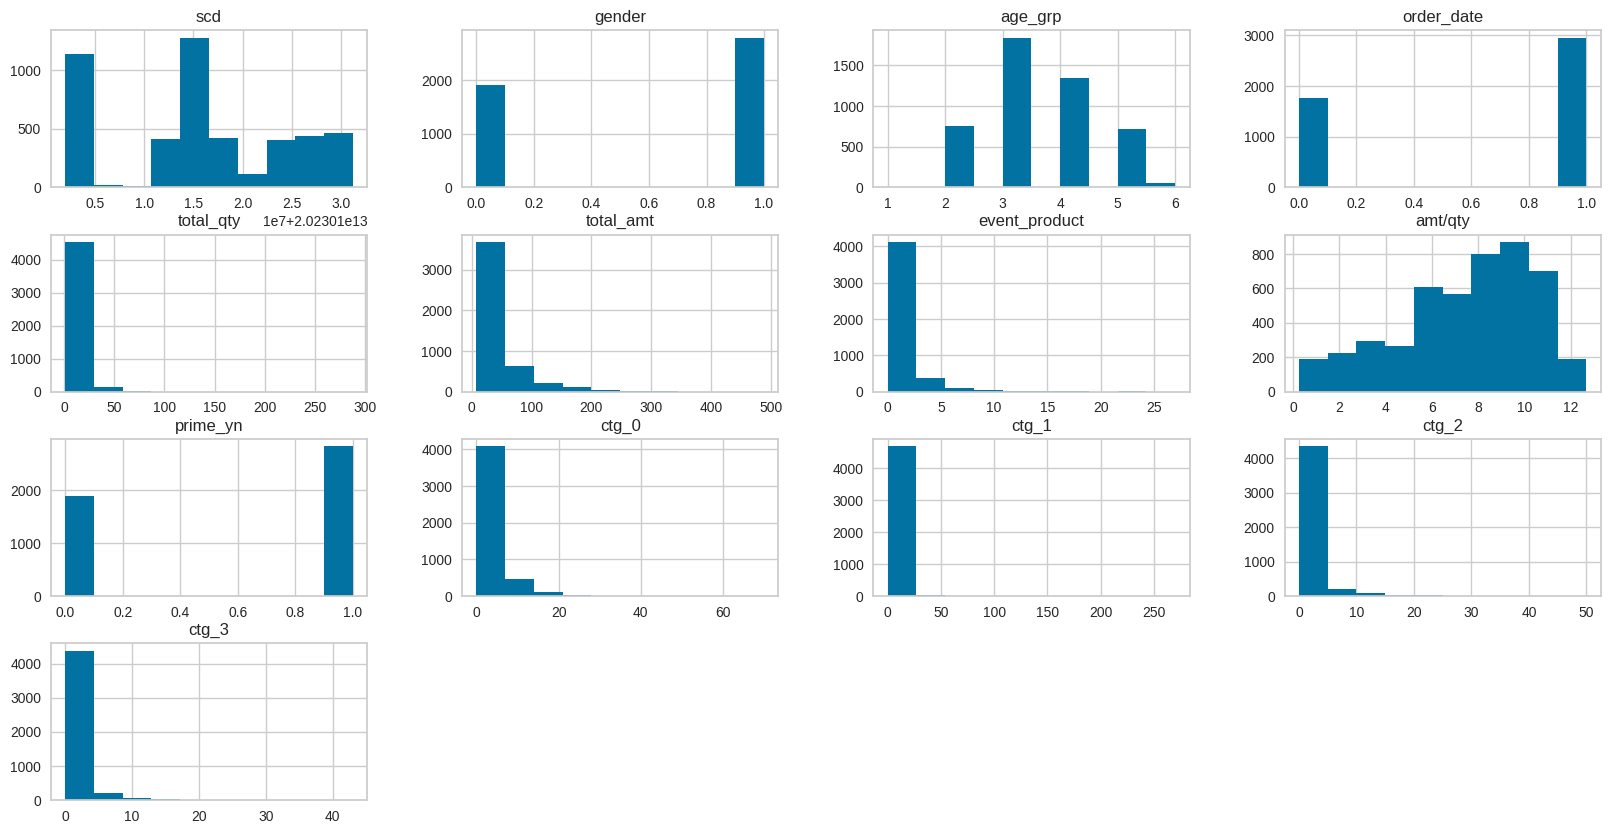

In [53]:
import matplotlib.pyplot as plt
pd.DataFrame(df_y).hist(figsize=(20,10))

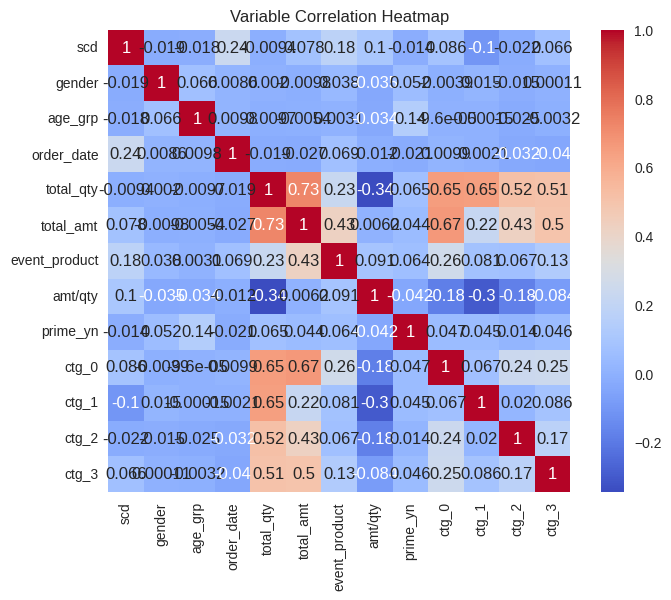

In [54]:
# 변수 간 상관관계
import seaborn as sns
import matplotlib.pyplot as plt
correlation_matrix = df_y.corr()

# 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Variable Correlation Heatmap')
plt.show()

In [57]:
# automl 돌려보기
import pycaret
from pycaret import classification
classification.setup(data=df_y, target='prime_yn', remove_outliers=True)
best = classification.compare_models(n_select=5,fold=5)

,Description,Value
0,Session id,8225
1,Target,prime_yn
2,Target type,Binary
3,Original data shape,"(4713, 13)"
4,Transformed data shape,"(4548, 13)"
5,Transformed train set shape,"(3134, 13)"
6,Transformed test set shape,"(1414, 13)"
7,Numeric features,12
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.6156,0.6161,0.8319,0.6380,0.7221,0.1327,0.1457,0.7140
lda,Linear Discriminant Analysis,0.6129,0.5903,0.8980,0.6233,0.7358,0.0928,0.1194,0.1120
ridge,Ridge Classifier,0.6126,0.0000,0.9041,0.6221,0.7370,0.0888,0.1165,0.0980
ada,Ada Boost Classifier,0.6081,0.6018,0.8309,0.6321,0.7179,0.1130,0.1252,0.7060
xgboost,Extreme Gradient Boosting,0.6068,0.6222,0.7259,0.6562,0.6888,0.1580,0.1600,1.2360
rf,Random Forest Classifier,0.6008,0.5943,0.7592,0.6417,0.6954,0.1278,0.1318,0.8020
lr,Logistic Regression,0.6005,0.5012,1.0000,0.6005,0.7504,0.0000,0.0000,2.0000
nb,Naive Bayes,0.6005,0.4938,1.0000,0.6005,0.7504,0.0000,0.0000,0.1100
dummy,Dummy Classifier,0.6005,0.5000,1.0000,0.6005,0.7504,0.0000,0.0000,0.1080
lightgbm,Light Gradient Boosting Machine,0.5968,0.6009,0.7456,0.6416,0.6894,0.1238,0.1269,0.4840


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

In [58]:
from pycaret.classification import *
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.6205,0.6258,0.8375,0.6409,0.7257,0.1429,0.1584,0.8140
ada,Ada Boost Classifier,0.6162,0.6104,0.8243,0.6402,0.7206,0.1377,0.1497,0.4800
lda,Linear Discriminant Analysis,0.6105,0.5893,0.8930,0.6225,0.7336,0.0884,0.1114,0.1240
ridge,Ridge Classifier,0.6087,0.0000,0.8965,0.6206,0.7334,0.0816,0.1047,0.1760
xgboost,Extreme Gradient Boosting,0.6075,0.6239,0.7385,0.6533,0.6928,0.1540,0.1568,0.4550
lightgbm,Light Gradient Boosting Machine,0.6008,0.6049,0.7496,0.6439,0.6924,0.1322,0.1359,0.2540
lr,Logistic Regression,0.6005,0.5011,1.0000,0.6005,0.7504,0.0000,0.0000,0.8570
nb,Naive Bayes,0.6005,0.4939,1.0000,0.6005,0.7504,0.0000,0.0000,0.1150
dummy,Dummy Classifier,0.6005,0.5000,1.0000,0.6005,0.7504,0.0000,0.0000,0.1200
rf,Random Forest Classifier,0.5987,0.6012,0.7486,0.6426,0.6913,0.1271,0.1302,1.0490


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [59]:
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6030,0.5161,1.0000,0.6030,0.7524,0.0000,0.0000
1,0.6000,0.5004,1.0000,0.6000,0.7500,0.0000,0.0000
2,0.6000,0.5101,1.0000,0.6000,0.7500,0.0000,0.0000
3,0.6000,0.4557,1.0000,0.6000,0.7500,0.0000,0.0000
4,0.6000,0.5017,1.0000,0.6000,0.7500,0.0000,0.0000
5,0.6000,0.4958,1.0000,0.6000,0.7500,0.0000,0.0000
6,0.6000,0.5393,1.0000,0.6000,0.7500,0.0000,0.0000
7,0.6000,0.5110,1.0000,0.6000,0.7500,0.0000,0.0000
8,0.6000,0.4645,1.0000,0.6000,0.7500,0.0000,0.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [67]:
tuned_lr = tune_model(lr)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6030,0.5161,1.0000,0.6030,0.7524,0.0000,0.0000
1,0.6000,0.5004,1.0000,0.6000,0.7500,0.0000,0.0000
2,0.6000,0.5101,1.0000,0.6000,0.7500,0.0000,0.0000
3,0.6000,0.4557,1.0000,0.6000,0.7500,0.0000,0.0000
4,0.6000,0.5017,1.0000,0.6000,0.7500,0.0000,0.0000
5,0.6000,0.4958,1.0000,0.6000,0.7500,0.0000,0.0000
6,0.6000,0.5393,1.0000,0.6000,0.7500,0.0000,0.0000
7,0.6000,0.5110,1.0000,0.6000,0.7500,0.0000,0.0000
8,0.6000,0.4645,1.0000,0.6000,0.7500,0.0000,0.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [60]:
# X, y 나누기
X = df_y.drop('prime_yn', axis=1)
y = df_y['prime_yn']

In [61]:
# train, valid 데이터셋 나누기
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, stratify=y, random_state=42)
print(X_train.shape, X_valid.shape, y_train.shape, y_valid.shape)

(3534, 12) (1179, 12) (3534,) (1179,)


In [62]:
from sklearn.linear_model import LogisticRegression

# 로지스틱 회귀 모델
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)

# 예측
pred = logistic_regression.predict(X_valid)

# 정확도 평가
accuracy = accuracy_score(y_valid, pred)
print("Accuracy:", accuracy)

Accuracy: 0.6005089058524173


In [63]:
# 모델 예측 및 평가
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
cfreport = classification_report(y_valid, pred)
print("분류예측 레포트:\n", cfreport)

f1 = f1_score(y_valid, pred)
print("f1 score:\n", f1)

분류예측 레포트:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       471
           1       0.60      1.00      0.75       708

    accuracy                           0.60      1179
   macro avg       0.30      0.50      0.38      1179
weighted avg       0.36      0.60      0.45      1179

f1 score:
 0.7503974562798092


- 파라미터 조정

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# 로지스틱 회귀 모델 초기화
logistic_regression = LogisticRegression()

param_grid = {
    'C': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0],
    'penalty': ['l1', 'l2']
}

# 그리드 서치
grid_search = GridSearchCV(logistic_regression, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# 최적 파라미터
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# 최적 파라미터로 학습된 모델 사용
best_model = grid_search.best_estimator_
pred = best_model.predict(X_valid)

# 정확도 평가
accuracy = accuracy_score(y_valid, pred)
print("Accuracy:", accuracy)

# 모델 예측 및 평가
cfreport = classification_report(y_valid, pred)
print("분류예측 레포트:\n", cfreport)

f1 = f1_score(y_valid, pred)
print("f1 score:\n", f1)

Best Parameters: {'C': 0.001, 'penalty': 'l2'}
Accuracy: 0.6005089058524173
분류예측 레포트:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       471
           1       0.60      1.00      0.75       708

    accuracy                           0.60      1179
   macro avg       0.30      0.50      0.38      1179
weighted avg       0.36      0.60      0.45      1179

f1 score:
 0.7503974562798092


In [69]:
# 그래디언트 부스팅
from sklearn.ensemble import GradientBoostingClassifier
gradient_boosting = GradientBoostingClassifier()

# 모델 학습
gradient_boosting.fit(X_train, y_train)

# 예측
pred = gradient_boosting.predict(X_valid)

# 정확도 평가
accuracy = accuracy_score(y_valid, pred)
print("Accuracy:", accuracy)

# 평가
cfreport = classification_report(y_valid, pred)
print("분류예측 레포트:\n", cfreport)

f1 = f1_score(y_valid, pred)
print("f1 score:\n", f1)

Accuracy: 0.6463104325699746
분류예측 레포트:
               precision    recall  f1-score   support

           0       0.66      0.24      0.35       471
           1       0.64      0.92      0.76       708

    accuracy                           0.65      1179
   macro avg       0.65      0.58      0.56      1179
weighted avg       0.65      0.65      0.60      1179

f1 score:
 0.7565674255691769
